In [22]:
# imports
import pandas as pd
import numpy as np
import os.path

from PIL import Image, ImageOps, ImageEnhance
from numpy import percentile



In [35]:
# directorios resultantes de crear el dataset
raw_dir = '../data/raw/raw_xrays'

filtered_raw_dir = '../data/raw/filtered_xrays'

raw_128_dir = '../data/raw/128'

processed_csv_path = '../data/processed/filtered.txt'

processed_train_dir = '../data/processed/train'
processed_test_dir = '../data/processed/test'

train_split_raw_csv_path = '../data/raw/train_split.txt'
test_split_raw_csv_path = '../data/raw/test_split.txt'




# Crear un dataframe del csv

In [24]:
names = ['patient_id', 'image_id', 'disease', 'method']
train_df = pd.read_csv(train_split_raw_csv_path, delimiter = ' ', names = names)
test_df = pd.read_csv(test_split_raw_csv_path, delimiter = ' ', names = names)

In [25]:
train_df.head(10)

,patient_id,image_id,disease,method
0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,cohen
1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,cohen
2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,cohen
3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,cohen
4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,cohen
5,9,SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...,pneumonia,cohen
6,9,SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...,pneumonia,cohen
7,10,SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...,pneumonia,cohen
8,10,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,pneumonia,cohen
9,10,SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...,pneumonia,cohen


In [26]:
test_df.head(10)

,patient_id,image_id,disease,method
0,8,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...,pneumonia,cohen
1,31,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia,cohen
2,31,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia,cohen
3,31,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia,cohen
4,31,streptococcus-pneumoniae-pneumonia-temporal-ev...,pneumonia,cohen
5,19,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,COVID-19,cohen
6,19,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,COVID-19,cohen
7,19,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,COVID-19,cohen
8,19,1-s2.0-S0929664620300449-gr2_lrg-d.jpg,COVID-19,cohen
9,20,covid-19-pneumonia-15-PA.jpg,COVID-19,cohen


In [27]:
raw_df = train_df.append(test_df)
print(np.unique(raw_df['disease']))
print(raw_df['disease'].value_counts())

['COVID-19' 'normal' 'pneumonia']
normal       8851
pneumonia    6069
COVID-19      571
Name: disease, dtype: int64


In [29]:
# Al tener que hacer un crop manual de las imágenes, se seleccionan 100 
#  de cada enfermedad para tener un dataset balanceado
is_normal = raw_df['disease'] == 'normal'
is_pneumonia = raw_df['disease'] == 'pneumonia'
is_covid = raw_df['disease'] == 'COVID-19'

normal_df = raw_df[is_normal].head(100)
print(normal_df.shape, 'Normal')
pneumonia_df = raw_df[is_pneumonia].head(100)
print(pneumonia_df.shape, 'Pneumonia')
covid_df = raw_df[is_covid].head(100)
print(covid_df.shape, 'Covid')


filtered_df = normal_df.append(pneumonia_df).append(covid_df)
print(filtered_df.shape, 'Filtered')


# guardo cada una de esas 300 imágenes en un directorio diferente para después croppearlas a mano

for id in filtered_df['image_id']:
    img = Image.open(f'{raw_dir}/{id}')
#     Linea comentada para no pisar las imagenes cropeadas
#     ImageOps.grayscale(img).save(f'{filtered_raw_dir}/{id}')
    img.close()



(100, 4) Normal
(100, 4) Pneumonia
(100, 4) Covid
(300, 4) Filtered


# Tratamiento de imágenes

1. Normalizar a 128x128
2. Pasar a escala de grises
3. Aumentar el contraste

In [31]:
size = 128

In [33]:
def store_gray_resized_imgs(img_array):
    for index, name in enumerate(img_array):
        print(f'Guardando #{index} {filtered_raw_dir}/{name}')
        ogImage = Image.open(f'{filtered_raw_dir}/{name}')
        g_img = ImageOps.grayscale(ogImage)
        enhancer = ImageEnhance.Contrast(g_img)
        enhancer.enhance(2) # aumenta el contraste en un 100%
        img_128 = g_img.resize((size, size))
        img_128.save(f'{raw_128_dir}/{name}')

store_gray_resized_imgs(filtered_df['image_id'])




Guardando #0 ../data/raw/filtered_xrays/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.png
Guardando #1 ../data/raw/filtered_xrays/009eb222-eabc-4150-8121-d5a6d06b8ebf.png
Guardando #2 ../data/raw/filtered_xrays/01027bc3-dc40-4165-a6c3-d6be2cb7ca34.png
Guardando #3 ../data/raw/filtered_xrays/017c7b5b-618e-4bc9-943c-04c6a988d992.png
Guardando #4 ../data/raw/filtered_xrays/019ca122-9cdf-4704-b7a9-449c8a1c263e.png
Guardando #5 ../data/raw/filtered_xrays/01a4059c-22f7-4f51-8a27-50aff0b3aeb3.png
Guardando #6 ../data/raw/filtered_xrays/01aad2a6-3b93-45e3-bf37-2d73348cb6fc.png
Guardando #7 ../data/raw/filtered_xrays/01b15f07-1149-4ff8-9756-bc821e41b97c.png
Guardando #8 ../data/raw/filtered_xrays/01be3fe5-4a91-4c57-9af6-305966a7d0aa.png
Guardando #9 ../data/raw/filtered_xrays/01c0b605-0a82-401b-9649-81252304ac45.png
Guardando #10 ../data/raw/filtered_xrays/01cc7c75-4498-43ab-b650-5553d0507f76.png
Guardando #11 ../data/raw/filtered_xrays/01e4fd43-4f2c-421f-bd68-c756dceb5742.png
Guardando #12 ../data/raw/

Guardando #107 ../data/raw/filtered_xrays/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
Guardando #108 ../data/raw/filtered_xrays/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
Guardando #109 ../data/raw/filtered_xrays/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
Guardando #110 ../data/raw/filtered_xrays/streptococcus-pneumoniae-pneumonia-1.jpg
Guardando #111 ../data/raw/filtered_xrays/pneumonia-7.jpg
Guardando #112 ../data/raw/filtered_xrays/pneumococcal-pneumonia-day0.jpg
Guardando #113 ../data/raw/filtered_xrays/pneumococcal-pneumonia-day7.jpg
Guardando #114 ../data/raw/filtered_xrays/pneumococcal-pneumonia-day35.jpg
Guardando #115 ../data/raw/filtered_xrays/parapneumonic-effusion-1-PA.png
Guardando #116 ../data/raw/filtered_xrays/right-upper-lobe-pneumonia-9-PA.jpg
Guardando #117 ../data/raw/filtered_xrays/chlamydia-pneumonia-PA.png
Guardando #118 ../data/raw/filtered_xrays/aspiration-pneumonia-5-day0.jpg
Guardando #119 ../data/raw/filtered_xrays/aspiration-

Guardando #219 ../data/raw/filtered_xrays/jkms-35-e79-g001-l-a.jpg
Guardando #220 ../data/raw/filtered_xrays/jkms-35-e79-g001-l-b.jpg
Guardando #221 ../data/raw/filtered_xrays/jkms-35-e79-g001-l-c.jpg
Guardando #222 ../data/raw/filtered_xrays/radiol.2020200490.fig3.jpeg
Guardando #223 ../data/raw/filtered_xrays/covid-19-pneumonia-2.jpg
Guardando #224 ../data/raw/filtered_xrays/covid-19-pneumonia-7-PA.jpg
Guardando #225 ../data/raw/filtered_xrays/covid-19-pneumonia-14-PA.png
Guardando #226 ../data/raw/filtered_xrays/covid-19-pneumonia-12.jpg
Guardando #227 ../data/raw/filtered_xrays/39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg
Guardando #228 ../data/raw/filtered_xrays/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
Guardando #229 ../data/raw/filtered_xrays/2C10A413-AABE-4807-8CCE-6A2025594067.jpeg
Guardando #230 ../data/raw/filtered_xrays/E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg
Guardando #231 ../data/raw/filtered_xrays/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg
Guardando #232 ../data/raw/filter

In [36]:
# Save index to csv
filtered_df.to_csv(processed_csv_path)


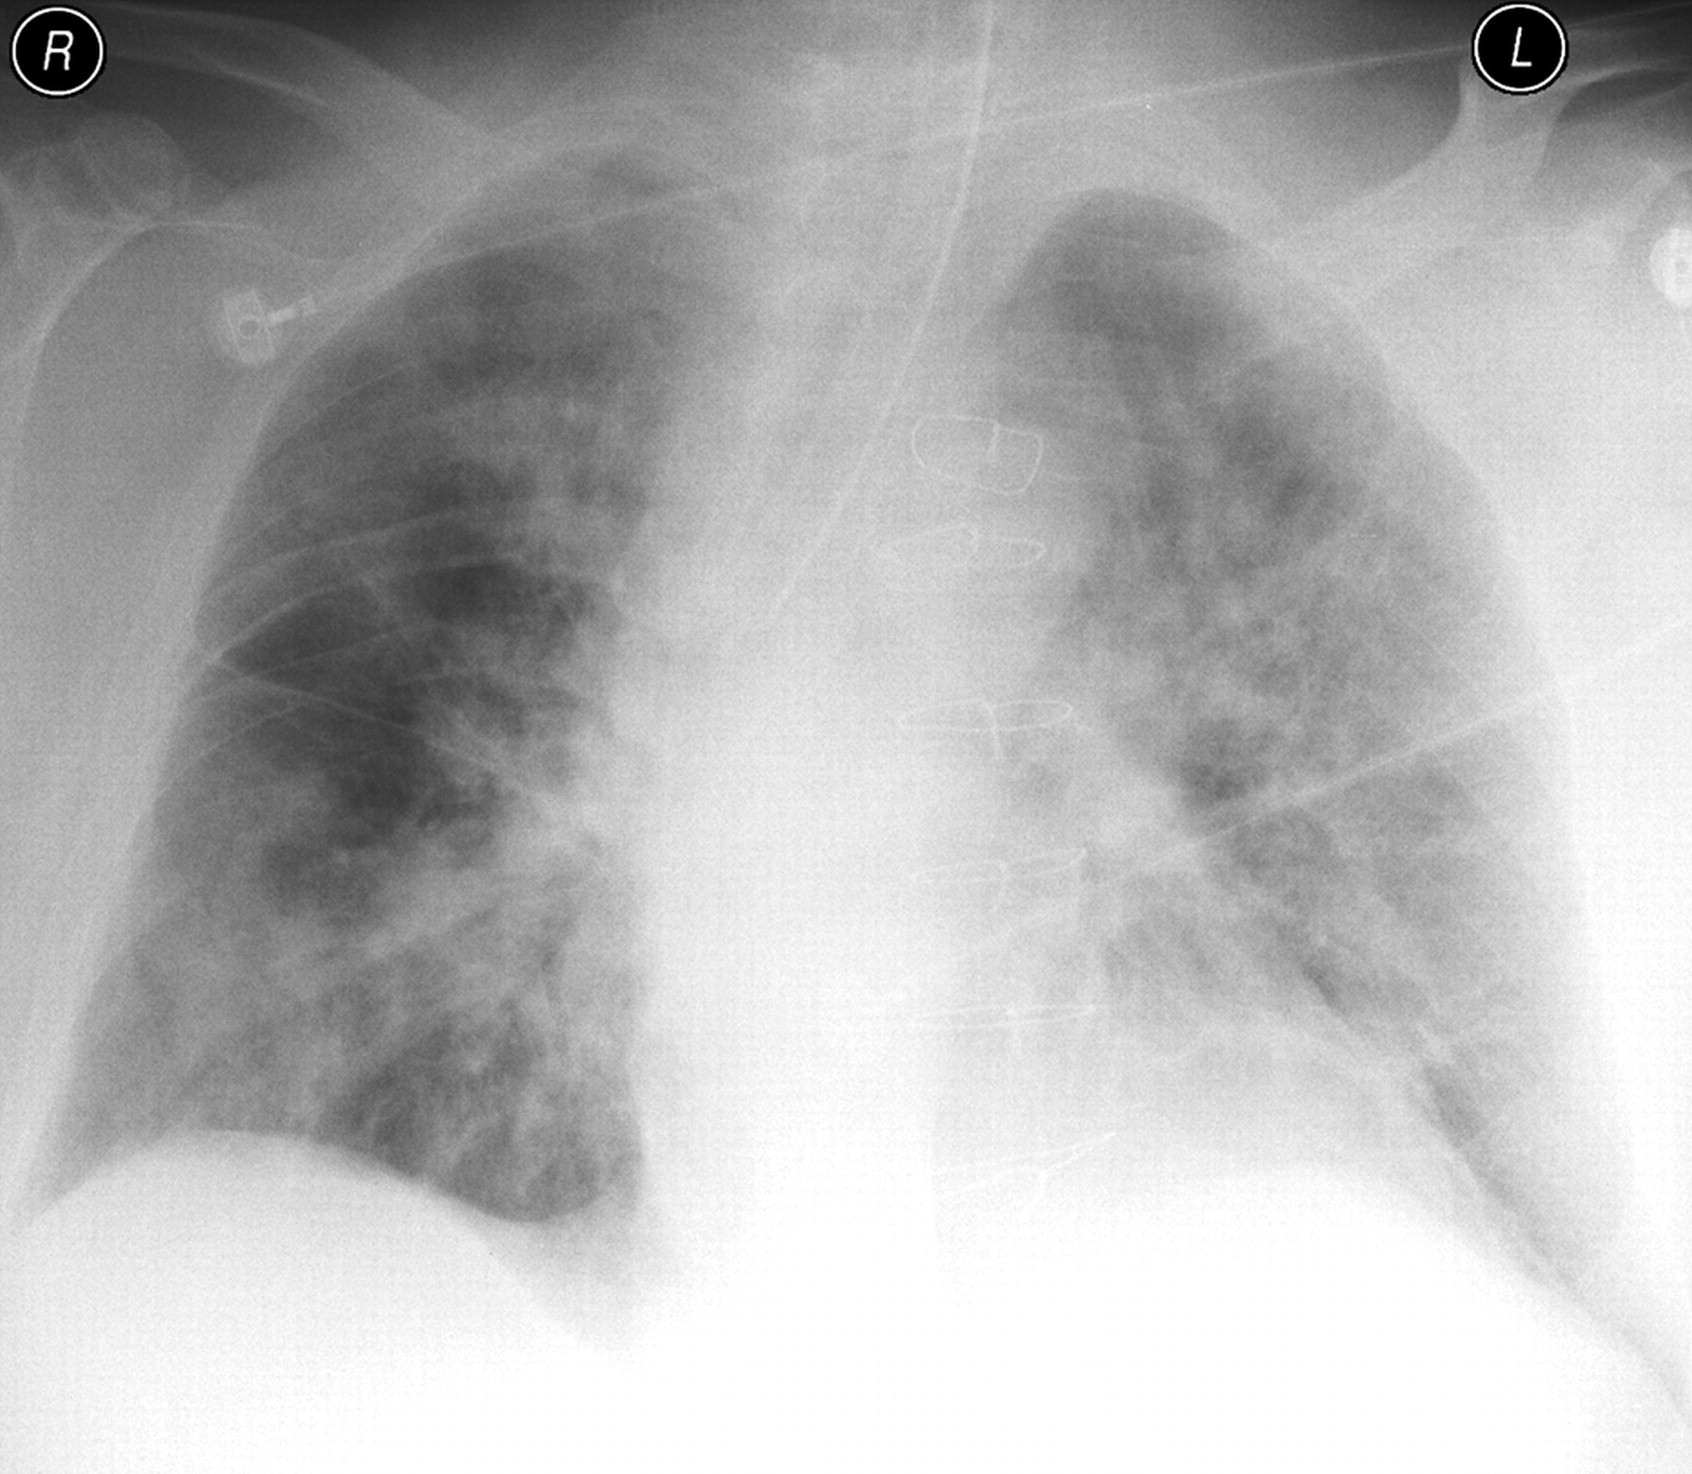

In [38]:
example_img_id = filtered_df['image_id'][0]
print('Imagen original')
Image.open(f'{raw_dir}/{example_img_id}')

Imagen resultante


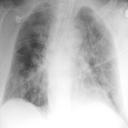

In [39]:
print('Imagen resultante')
Image.open(f'{raw_128_dir}/{example_img_id}')